In [29]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [30]:
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')



df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [31]:
df.shape

(7043, 21)

In [32]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [33]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [34]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [35]:
df.isnull().sum(axis=1)

,0
0,0
1,0
2,0
3,0
4,0
...,...
7038,0
7039,0
7040,0
7041,0


In [36]:
missing = df.isnull().sum(axis=1)>0
missing

,0
0,False
1,False
2,False
3,False
4,False
...,...
7038,False
7039,False
7040,False
7041,False


In [37]:
df[missing]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [38]:
df["Contract"].value_counts()

,count
Contract,
Month-to-month,3875
Two year,1695
One year,1473


In [39]:
if 'TotalCharges' in df.columns:
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [40]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [41]:
contract_map = {'Month-to-month': 0, 'One year': 1, 'Two year': 2}
df['Contract_numeric'] = df['Contract'].map(contract_map)

In [42]:
df["Contract_numeric"].value_counts()

,count
Contract_numeric,
0,3875
2,1695
1,1473


In [43]:
df["Contract"].value_counts()

,count
Contract,
Month-to-month,3875
Two year,1695
One year,1473


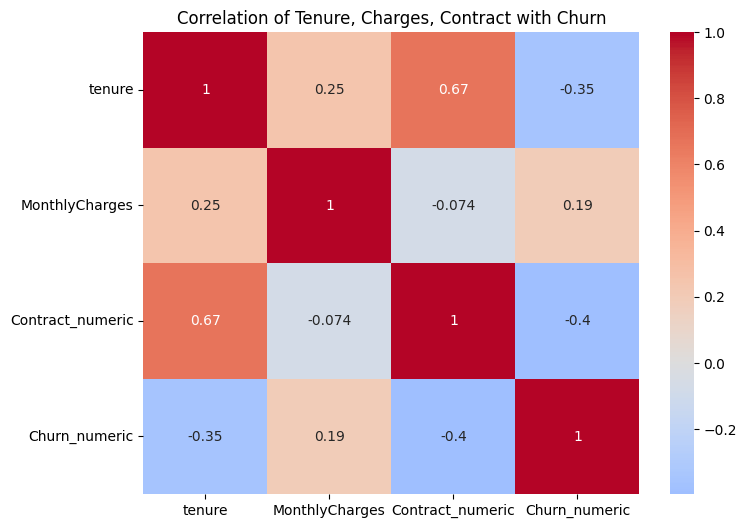

In [44]:
numeric_feats = ['tenure', 'MonthlyCharges', 'Contract_numeric']
df['Churn_numeric'] = df['Churn'].map({'No': 0, 'Yes': 1})

corr = df[numeric_feats + ['Churn_numeric']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, vmax=1)
plt.title('Correlation of Tenure, Charges, Contract with Churn')
plt.show()

In [45]:
print(df[['tenure', 'Contract', 'MonthlyCharges']].isnull().sum())

tenure            0
Contract          0
MonthlyCharges    0
dtype: int64


Implementing the Markov Model .


Number of states: 12

Sample transitions:
LowTenure_LowPay_Month-to-month -> {'Stayed': 0.6058201058201058, 'Churned': 0.3941798941798942}
HighTenure_LowPay_One year -> {'Stayed': 0.9446107784431138, 'Churned': 0.05538922155688623}
LowTenure_HighPay_Month-to-month -> {'Churned': 0.7028423772609819, 'Stayed': 0.2971576227390181}
HighTenure_HighPay_Month-to-month -> {'Stayed': 0.5796078431372549, 'Churned': 0.4203921568627451}
HighTenure_LowPay_Month-to-month -> {'Stayed': 0.815028901734104, 'Churned': 0.18497109826589594}


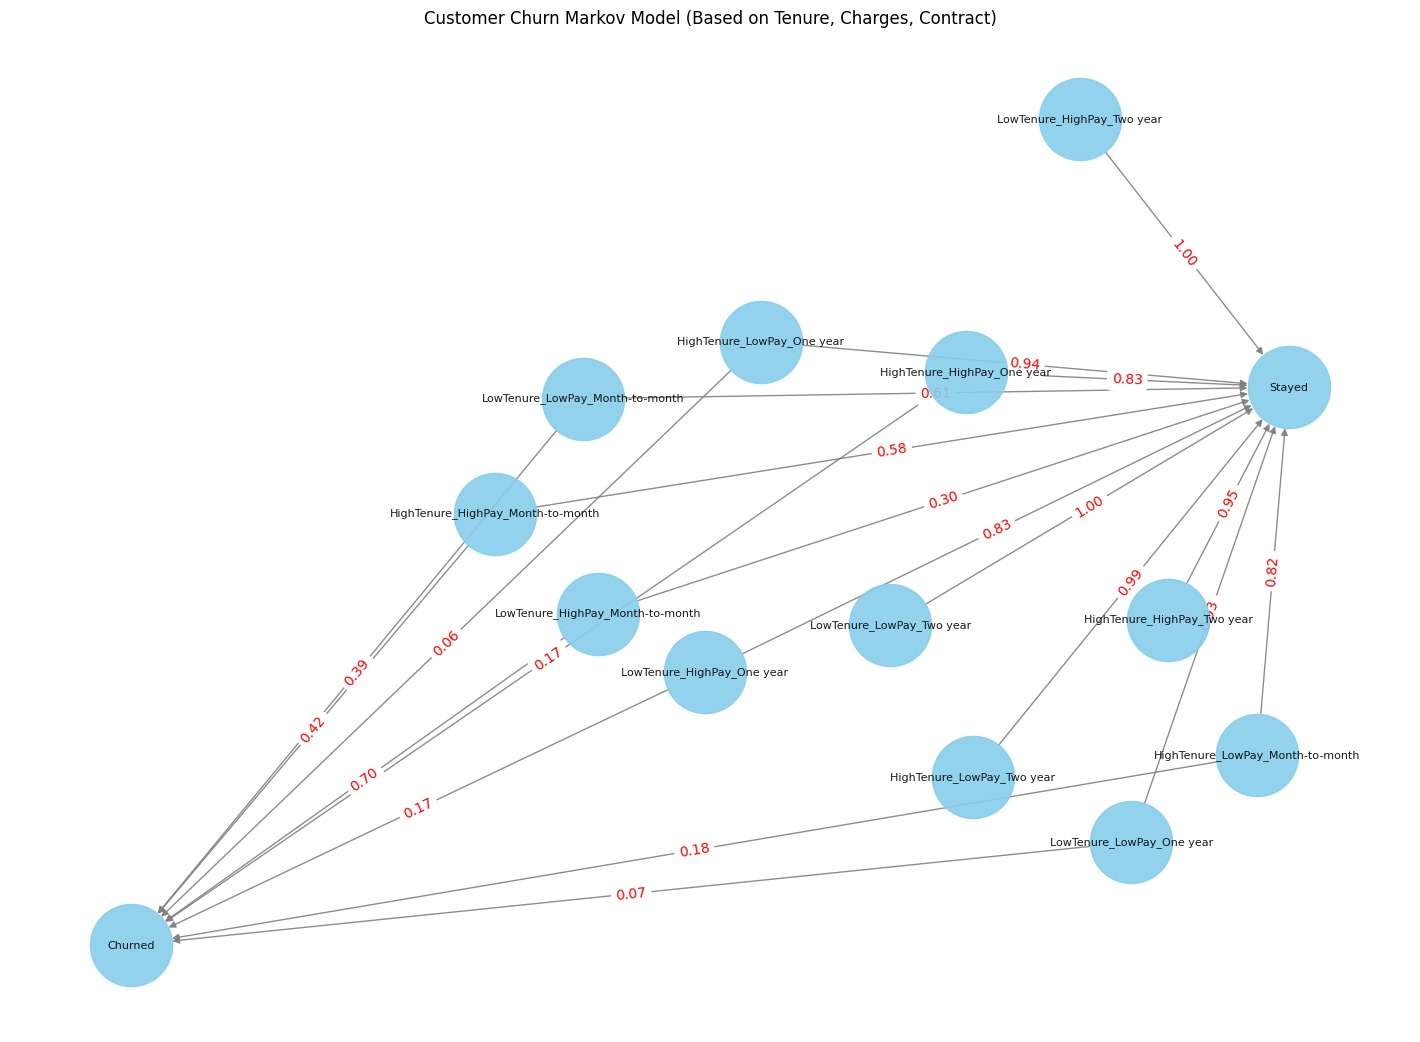

In [46]:
import networkx as nx

median_charge = df["MonthlyCharges"].median()

def create_state(row):
    tenure_state = "LowTenure" if row["tenure"] < 12 else "HighTenure"
    charge_state = "LowPay" if row["MonthlyCharges"] < median_charge else "HighPay"
    return f"{tenure_state}_{charge_state}_{row['Contract']}"

df["Current"] = df.apply(create_state, axis=1)

# Define next state: Churned or Stayed
# Use the 'Churn_numeric' column which contains 0s and 1s
df["Next"] = df["Churn_numeric"].apply(lambda x: "Churned" if x == 1 else "Stayed")

markov_model = {}

for i in range(len(df["Current"])):
    curr_state = df["Current"].iloc[i]
    next_state = df["Next"].iloc[i]

    if curr_state not in markov_model:
        markov_model[curr_state] = {}

    if next_state not in markov_model[curr_state]:
        markov_model[curr_state][next_state] = 1
    else:
        markov_model[curr_state][next_state] += 1

for curr_state, transitions in markov_model.items():
    total = sum(transitions.values())
    if total > 0: # Avoid division by zero if a state has no transitions
        for state, count in transitions.items():
            markov_model[curr_state][state] = count / total

print("Number of states:", len(markov_model.keys()))
print("\nSample transitions:")
for k, v in list(markov_model.items())[:5]:
    print(f"{k} -> {v}")

G = nx.DiGraph()

for curr_state, transitions in markov_model.items():
    for next_state, prob in transitions.items():
        if prob > 0.05: # Only add edges with significant probability
            G.add_edge(curr_state, next_state, weight=prob)

plt.figure(figsize=(14, 10)) # Increased figure size
pos = nx.spring_layout(G, k=0.8, iterations=50, seed=42) # Increased k, iterations, and added seed
nx.draw(G, pos, with_labels=True, node_size=3500, node_color="skyblue", font_size=8, edge_color='gray', alpha=0.9)
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels={(i, j): f"{d['weight']:.2f}" for i, j, d in G.edges(data=True)},
    font_color='red'
)
plt.title("Customer Churn Markov Model (Based on Tenure, Charges, Contract)")
plt.show()

In [47]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


Implementing SVM

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [49]:

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


df.dropna(subset=['TotalCharges'], inplace=True)
print("DataFrame shape after dropping missing TotalCharges:"), df.shape

DataFrame shape after dropping missing TotalCharges:


(None, (7032, 25))

In [50]:
df['Churn_numeric'] = df['Churn'].map({'No': 0, 'Yes': 1})
print("\nOutput variable (Churn) distribution:")
print(df['Churn_numeric'].value_counts())

categorical_cols = [
    'gender', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod', 'SeniorCitizen' # SeniorCitizen is 0/1 but treated as categorical/binary
]


Output variable (Churn) distribution:
Churn_numeric
0    5163
1    1869
Name: count, dtype: int64


In [51]:
cols_to_drop_from_df = ['customerID', 'Churn']
if 'Current' in df.columns:
    cols_to_drop_from_df.append('Current')
if 'Next' in df.columns:
    cols_to_drop_from_df.append('Next')

df_encoded = pd.get_dummies(df.drop(columns=cols_to_drop_from_df), columns=categorical_cols, drop_first=True)

In [52]:
X_all = df_encoded.drop(columns=['Churn_numeric'])
y = df_encoded['Churn_numeric']

In [55]:


numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

X_cat_names_only = [col for col in X_all.columns if col not in numerical_cols]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols)],
    remainder='passthrough'
)


X_preprocessed = preprocessor.fit_transform(X_all)

feature_names = numerical_cols + X_cat_names_only
X_final = pd.DataFrame(X_preprocessed, columns=feature_names)

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Contract_numeric,Churn_numeric,Current,Next
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,Month-to-month,Yes,Electronic check,29.85,29.85,No,0,0,LowTenure_LowPay_Month-to-month,Stayed
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,One year,No,Mailed check,56.95,1889.50,No,1,0,HighTenure_LowPay_One year,Stayed
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0,1,LowTenure_LowPay_Month-to-month,Churned
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,One year,No,Bank transfer (automatic),42.30,1840.75,No,1,0,HighTenure_LowPay_One year,Stayed
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0,1,LowTenure_HighPay_Month-to-month,Churned


In [54]:

X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42, stratify=y)
print(f"\nTraining set size: {X_train.shape[0]}, Test set size: {X_test.shape[0]}")

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

svm_model = SVC(kernel='rbf', random_state=42)


svm_model.fit(X_train, y_train)


y_pred = svm_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"\nSVM Model Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Training set size: 4922, Test set size: 2110

SVM Model Accuracy: 0.7967

Confusion Matrix:
[[1414  135]
 [ 294  267]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1549
           1       0.66      0.48      0.55       561

    accuracy                           0.80      2110
   macro avg       0.75      0.69      0.71      2110
weighted avg       0.78      0.80      0.78      2110



/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


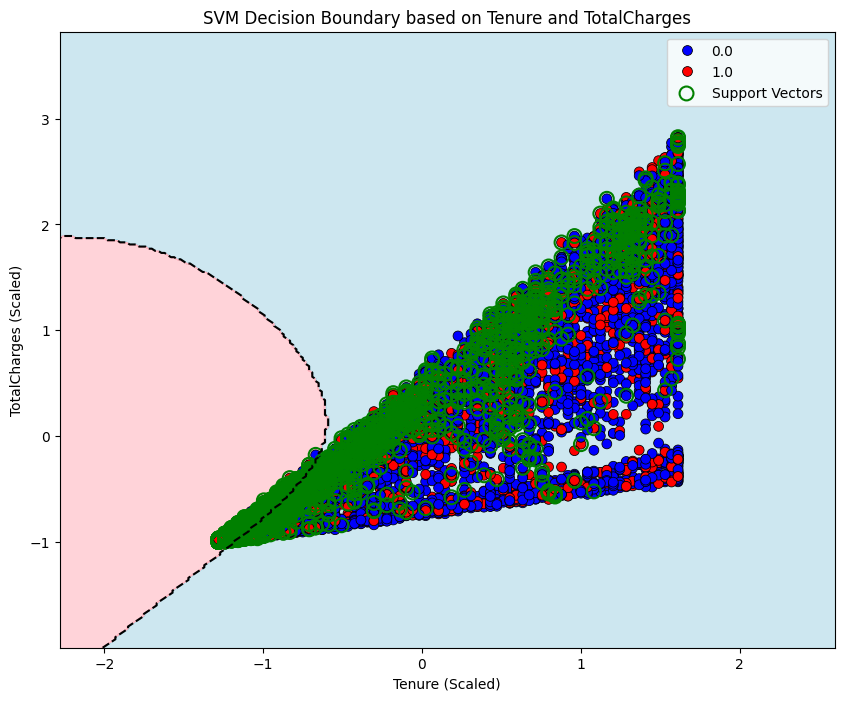

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

X_2d = X_final[['tenure', 'TotalCharges']]

# Split the 2D data (using the same split strategy for consistency if possible, or just re-split)
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(
    X_2d, y, test_size=0.3, random_state=42, stratify=y
)

# Train a new SVM classifier on these two features
svm_2d = SVC(kernel='rbf', random_state=42)
svm_2d.fit(X_train_2d, y_train_2d)

# Create a mesh to plot the decision boundary
x_min, x_max = X_2d.iloc[:, 0].min() - 1, X_2d.iloc[:, 0].max() + 1
y_min, y_max = X_2d.iloc[:, 1].min() - 1, X_2d.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict on the meshgrid points
Z = svm_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 8))

# Define a colormap for the background regions (e.g., light blue for 0, light red for 1)
cmap_background = ListedColormap(['#ADD8E6', '#FFB6C1'])
plt.contourf(xx, yy, Z, alpha=0.6, cmap=cmap_background)

# Add the decision boundary line
plt.contour(xx, yy, Z, levels=[0.5], colors='k', linestyles='--', linewidths=1.5)

# Plot the actual data points
sns.scatterplot(
    x=X_2d.iloc[:, 0], y=X_2d.iloc[:, 1], hue=y,
    palette={0: '#0000FF', 1: '#FF0000'}, # Blue for No Churn, Red for Churn
    marker='o', s=50, edgecolor='k', legend='full'
)

# Highlight support vectors
plt.scatter(svm_2d.support_vectors_[:, 0], svm_2d.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='g', linewidths=1.5, label='Support Vectors')

plt.xlabel('Tenure (Scaled)')
plt.ylabel('TotalCharges (Scaled)')
plt.title('SVM Decision Boundary based on Tenure and TotalCharges')
plt.legend() # Show legend for support vectors
plt.show()

